In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.graph_objects as go # Generate Graphs
from plotly.subplots import make_subplots #To Create Subplots
import plotly.express as px 
sb.set()

c:\Users\Rebirth\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


<h1> Data variables </h1>

<ul>
<li>Age | Objective Feature | age | int (days) Linear Regression/Clustering and then see each category data points (convert to years)
<li>Height | Objective Feature | height | int (cm) | Linear Regression/Clustering and then see each category data points (maybe not)
<li>Weight | Objective Feature | weight | float (kg) | Linear Regression/Clustering and then see each category data points (maybe not)
<li>Gender | Objective Feature | gender | categorical code | Correlation-Matrix to determine the probability analysis (split into male and female and then see how many cvd vs non-cvd and see are they similar or there is a correlation)
<li>BMI | added feature using height and weight | float | classification tree
<li>Systolic blood pressure | Examination Feature | ap_hi | int | classification tree
<li>Diastolic blood pressure | Examination Feature | ap_lo | int | classification tree
<li>Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal | clustering and do analysis on it
<li>Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal | clustering and do analysis on it
<li>Smoking | Subjective Feature | smoke | binary | Correlation-Matrix to determine the probability analysis (split into yes and no and then see how many cvd vs non-cvd and see are they similar or there is a correlation)
<li>Alcohol intake | Subjective Feature | alco | binary | Correlation-Matrix to determine the probability analysis (split into yes and no and then see how many cvd vs non-cvd and see are they similar or there is a correlation)
<li>Physical activity | Subjective Feature | active | binary | Correlation-Matrix to determine the probability analysis (split into yes and no and then see how many cvd vs non-cvd and see are they similar or there is a correlation)
<li>Presence or absence of cardiovascular disease | Target Variable | cardio | binary | Response


Binary Logistic Regression can be used

//get rid of outliers: -ve blood pressure, short height ie less than 120cm or a percentile, co


### Cleaning of Data

Removing missing values, duplicates



In [2]:
null_values = ['?', '--', ' ', 'NA', 'N/A', '-']
dataSet = pd.read_csv('./cardio_train.csv', delimiter=';', nrows = 70000, na_values = null_values) #delimiter function specifies the boundary between separate, independant regions in plain text or other data stream
dataSet.drop(columns=['id'], inplace=True) #No need ID variable
dataSet.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#### Missing Values:

In [3]:
var_null = [feature for feature in dataSet.columns if dataSet[feature].isnull().sum()>0] #Check for null values
if var_null:
    print('Features with Null Values {}'.format(var_null))
else:
    print('Dataset contains no Null Values')

Dataset contains no Null Values


#### Duplicates:


In [4]:
duplicate = dataSet.duplicated().sum()
if duplicate: #check for duplicate
    print('Duplicates Rows in Dataset are : {}'.format(duplicate))
else:
    print('Dataset contains no Duplicate Values')
duplicated = dataSet[dataSet.duplicated(keep=False)] #Duplicated data
dataSet.drop_duplicates(keep = 'first', inplace = True) # Drop duplicated data 
print('Total {} datapoints remaining with {} features'.format(dataSet.shape[0], dataSet.shape[1]))

Duplicates Rows in Dataset are : 24
Total 69976 datapoints remaining with 12 features


# Outliers:

##### Preview of Numerical Variables:

In [5]:
dataSet['years'] = (dataSet['age'] / 365).round().astype('int') # Conversion of age in months to years
numericalData = dataSet[['years', 'age', 'height', 'weight', 'ap_hi', 'ap_lo']].copy()
numericalData.describe()


,years,age,height,weight,ap_hi,ap_lo
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,53.338945,19468.950126,164.359152,74.208519,128.820453,96.636261
std,6.765633,2467.374620,8.211218,14.397211,154.037729,188.504581
min,30.000000,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,48.000000,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,54.000000,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,21327.000000,170.000000,82.000000,140.000000,90.000000
max,65.000000,23713.000000,250.000000,200.000000,16020.000000,11000.000000


Outliers:
1. Age has a very low min despite the average being 54yo and 25 percentile being 48yo. The low min might be outlier
2. Height min and max is suspiciously way too low/high, need plotting to see what is going on
3. Weight min is way too low to be physically possible, need plotting to see what is going on
4. ap_hi and ap_lo has negative values, which is not possible, need to remove negative values, use histogram to visualise

##### Outliers: Age

<AxesSubplot:xlabel='years', ylabel='Count'>

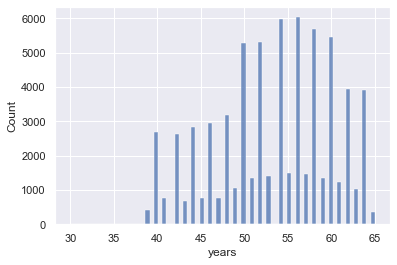

In [6]:
cleanedData = pd.DataFrame(dataSet)
cleanedData.drop(columns=['age'], inplace=True)
#Re-assign age to actual dataframe
age = pd.DataFrame(cleanedData['years'])
sb.histplot(data=age, x="years")

It seems that a good cut-off point for outliers is age 39

In [7]:
#Remove outliers
cleanedData.drop(cleanedData[(cleanedData.years < 39)].index, inplace=True)
cleanedData.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000,69972.000000
mean,1.349654,164.358986,74.208916,128.821386,96.637641,1.367018,1.226548,0.088164,0.053793,0.803707,0.499800,53.340279
std,0.476864,8.211214,14.397121,154.042070,188.509870,0.680347,0.572367,0.283535,0.225610,0.397195,0.500004,6.763525
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


##### Outliers: Blood Pressure


In [8]:
bloodPressure = pd.DataFrame(cleanedData[['ap_hi', 'ap_lo']])
bloodPressure.describe()


,ap_hi,ap_lo
count,69972.000000,69972.000000
mean,128.821386,96.637641
std,154.042070,188.509870
min,-150.000000,-70.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
max,16020.000000,11000.000000


Through our research, medical experts state that for ap_lo below 60mm hg and above 120mm hg is dangerous, whereas for ap_high below 90mm hg and the highest record level is 370mm hg. <br><br>It is safe to assume the viable range for ap_lo and ap_hi to be:

1. 60 < ap_lo < 120
2. 90 < ap_hi < 180

<br> Values that does not fall in this range are outliers

In [9]:
#Remove outliers
#drop anolymous data points
cleanedData.drop(cleanedData[(cleanedData.ap_lo < 50) | (cleanedData.ap_lo > 120) | (cleanedData.ap_hi > 180) | (cleanedData.ap_hi < 90)].index, inplace=True)
cleanedData.describe()


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,68262.000000,68262.000000,68262.000000,68262.000000,68262.000000,68262.000000,68262.000000,68262.000000,68262.000000,68262.000000,68262.000000,68262.000000
mean,1.348554,164.369371,74.093382,126.418300,81.230245,1.363394,1.225191,0.087721,0.053134,0.803507,0.493657,53.321819
std,0.476516,8.177802,14.292885,15.984809,9.193561,0.678142,0.571263,0.282891,0.224301,0.397348,0.499963,6.767310
min,1.000000,55.000000,11.000000,90.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


##### Outliers: Height and weight

We use a boxplot and violin plot to visualise the data first

<AxesSubplot:xlabel='weight'>

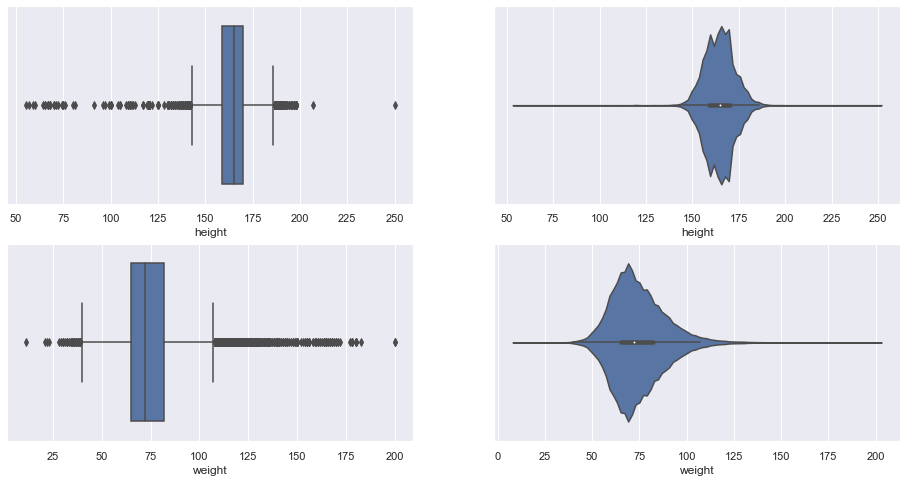

In [10]:
f, axes = plt.subplots(2, 2, figsize=(16, 8))
sb.boxplot(x = 'height', data = cleanedData , ax=axes[0][0])
sb.violinplot(x = 'height', data = cleanedData , ax=axes[0][1])
sb.boxplot(x = 'weight', data = cleanedData , ax=axes[1][0])
sb.violinplot(x = 'weight', data = cleanedData , ax=axes[1][1])

We will use interquartile range to removed the outliers for weight

In [11]:
#Weight
cleanedData_copy = cleanedData.copy(deep=True)
q75 = cleanedData_copy.weight.quantile(0.75)
q25 = cleanedData_copy.weight.quantile(0.25)
IQR = q75-q25
print(IQR)
outlierHead = q25 - IQR
outlierTail = q75 + IQR
print(outlierTail)
cleanedData_copy.drop(cleanedData_copy[(cleanedData_copy.weight > outlierHead) & (cleanedData_copy.weight < outlierTail)].index, inplace=True)
cleanedData_copy.describe()

17.0
99.0


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,4672.000000,4672.000000,4672.000000,4672.000000,4672.000000,4672.000000,4672.00000,4672.000000,4672.000000,4672.000000,4672.000000,4672.000000
mean,1.388913,165.788099,98.403221,132.675514,84.358091,1.555437,1.35274,0.109803,0.074058,0.794092,0.610017,53.328767
std,0.487556,10.454377,26.501634,18.787184,10.461088,0.784353,0.66966,0.312678,0.261894,0.404407,0.487798,6.872310
min,1.000000,75.000000,11.000000,90.000000,50.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,1.000000,159.000000,100.000000,120.000000,80.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,1.000000,165.000000,104.000000,130.000000,80.000000,1.000000,1.00000,0.000000,0.000000,1.000000,1.000000,54.000000
75%,2.000000,173.000000,111.000000,140.000000,90.000000,2.000000,1.00000,0.000000,0.000000,1.000000,1.000000,59.000000
max,2.000000,198.000000,200.000000,180.000000,120.000000,3.000000,3.00000,1.000000,1.000000,1.000000,1.000000,65.000000


We lose a lot of datapoints if we use IQR. So for weight we will use z-score method with the recommended threshold of 3 standard deviation. We also can assume normal distribition for height and weight as our violin plot does resemble the gaussian distribution and our sample size is large enough.

In [12]:
threshold = 3
mean = cleanedData['weight'].mean()
SD = cleanedData['weight'].std()
outlierHead = mean - 3*SD
outlierTail = mean + 3*SD
cleanedData.drop(cleanedData[(cleanedData.weight < outlierHead) | (cleanedData.weight > outlierTail)].index, inplace=True)
cleanedData.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,67554.000000,67554.000000,67554.000000,67554.000000,67554.000000,67554.000000,67554.000000,67554.000000,67554.000000,67554.000000,67554.000000,67554.000000
mean,1.347840,164.334828,73.535029,126.288169,81.164624,1.360452,1.222577,0.087234,0.052802,0.803639,0.491399,53.327664
std,0.476289,8.117904,13.149842,15.908983,9.157897,0.676097,0.568614,0.282180,0.223640,0.397248,0.499930,6.766525
min,1.000000,55.000000,32.000000,90.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,2.000000,250.000000,116.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


Height is next:

In [13]:
#Height
cleanedData_copy = cleanedData.copy(deep=True)
q75 = cleanedData_copy.height.quantile(0.75)
q25 = cleanedData_copy.height.quantile(0.25)
IQR = q75-q25
print(IQR)
outlierHead = q25 - IQR
outlierTail = q75 + IQR
print(outlierHead)
cleanedData_copy.drop(cleanedData_copy[(cleanedData_copy.height > outlierHead) & (cleanedData_copy.height < outlierTail)].index, inplace=True)
cleanedData_copy.describe()

11.0
148.0


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000
mean,1.507730,164.971115,76.732994,127.646867,81.805126,1.403173,1.217250,0.126526,0.072417,0.794142,0.508950,53.565094
std,0.500042,22.744488,17.716259,16.815108,9.616108,0.706230,0.558353,0.332508,0.259229,0.404410,0.500022,6.894817
min,1.000000,55.000000,32.000000,90.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,1.000000,146.000000,64.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,49.000000
50%,2.000000,181.000000,78.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,54.000000
75%,2.000000,184.000000,90.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,59.000000
max,2.000000,250.000000,116.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


Same with weight, we will use z-score for height as well

In [14]:
threshold = 3
mean = cleanedData['height'].mean()
SD = cleanedData['height'].std()
outlierHead = mean - 3*SD
outlierTail = mean + 3*SD
cleanedData.drop(cleanedData[(cleanedData.height < outlierHead) | (cleanedData.height > outlierTail)].index, inplace=True)
cleanedData.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,67292.000000,67292.000000,67292.00000,67292.000000,67292.000000,67292.000000,67292.000000,67292.000000,67292.000000,67292.000000,67292.000000,67292.000000
mean,1.347055,164.376598,73.51612,126.290941,81.167553,1.360934,1.222805,0.087068,0.052740,0.803899,0.491485,53.329608
std,0.476037,7.683083,13.13055,15.909540,9.154791,0.676453,0.568847,0.281937,0.223516,0.397048,0.499931,6.765423
min,1.000000,140.000000,32.00000,90.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,1.000000,159.000000,65.00000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,1.000000,165.000000,72.00000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,2.000000,170.000000,81.00000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,2.000000,188.000000,116.00000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


Since the rest of the variables are categorical, this ends our outlier remover.

# Exploratory Analysis

Response: Presence or absence of cardiovascular disease<br>
Analysis of each variable w.r.t Response

##### Age

<AxesSubplot:xlabel='years', ylabel='count'>

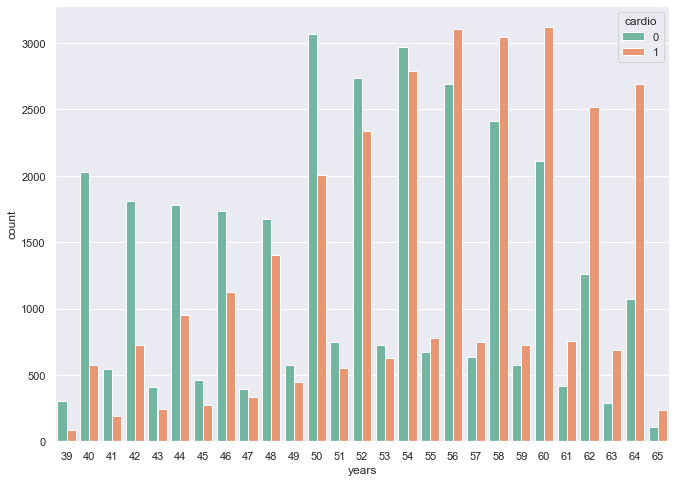

In [15]:
rcParams['figure.figsize'] = 11, 8
sb.countplot(x='years', hue='cardio', data = cleanedData, palette="Set2")


There seems to be a correlation between age and one having CVD. This is a factor we should consider for our model.
As the age increase, the number of people CVD increase such that it is more than the people who do not have CVD in that same age.<br><br>This is a factor we should consider for our model.

##### Weight

<AxesSubplot:xlabel='weight', ylabel='Count'>

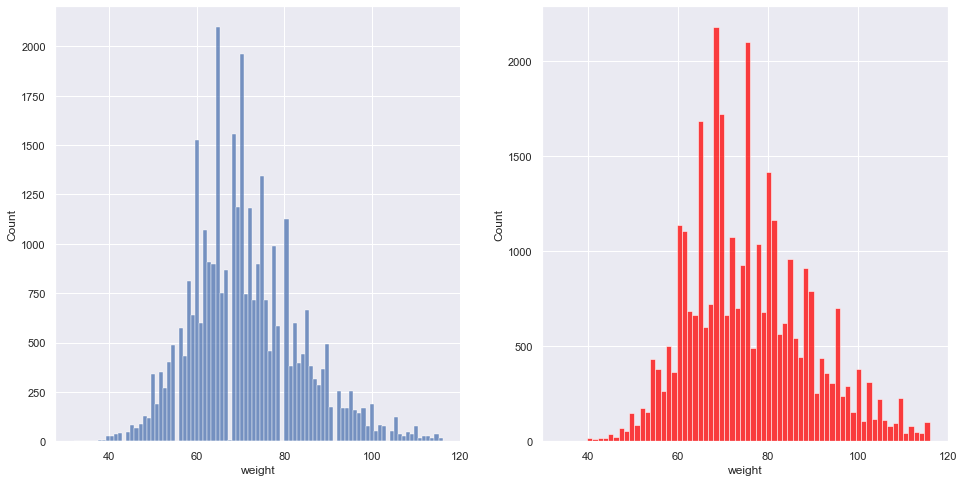

In [16]:
f, axes = plt.subplots(1, 2, figsize=(16, 8))
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'weight'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'weight'].copy()
sb.histplot(data=non_cvd, ax=axes[0])
sb.histplot(data=cvd, ax=axes[1], color='red')

There is not a noticeable difference in terms of height between the population of ppl with CVD and people without CVD.
<br><br>Thus weight will not be one of our factors to consider for our model

##### Height

<AxesSubplot:xlabel='height', ylabel='Count'>

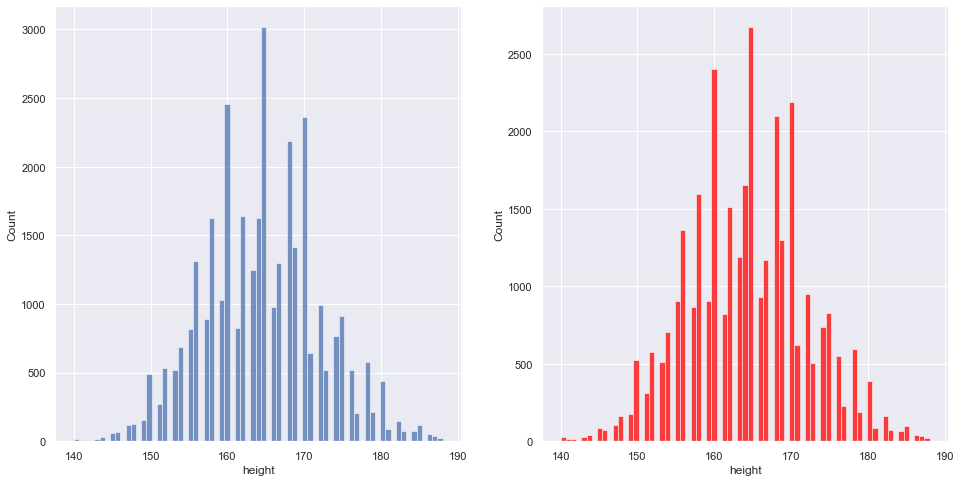

In [17]:
f, axes = plt.subplots(1, 2, figsize=(16, 8))
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'height'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'height'].copy()
sb.histplot(data=non_cvd, ax=axes[0])
sb.histplot(data=cvd, ax=axes[1], color='red')

Same with weight, there is not a noticeable difference in terms of height between the population of ppl with CVD and people without CVD.
<br><br>Thus height will not be one of our factors to consider for our model

##### Gender

In [18]:
#Gender
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'gender'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'gender'].copy()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.update_layout(title_text="Non-CVD vs CVD gender distribution", template="plotly_white")
fig.add_trace(go.Pie(values=non_cvd.value_counts().values,labels=['Female', 'Male']),row=1, col=1)
fig.add_trace(go.Pie(values=cvd.value_counts().values,labels=['Female', 'Male']),row=1, col=2)
fig.show()




There is not much difference between the distribution of gender from CVD population and non-CVD population.

<br>Thus Gender is not a factor that needs to be considered.

##### Systolic blood pressure

<AxesSubplot:xlabel='ap_hi', ylabel='Count'>

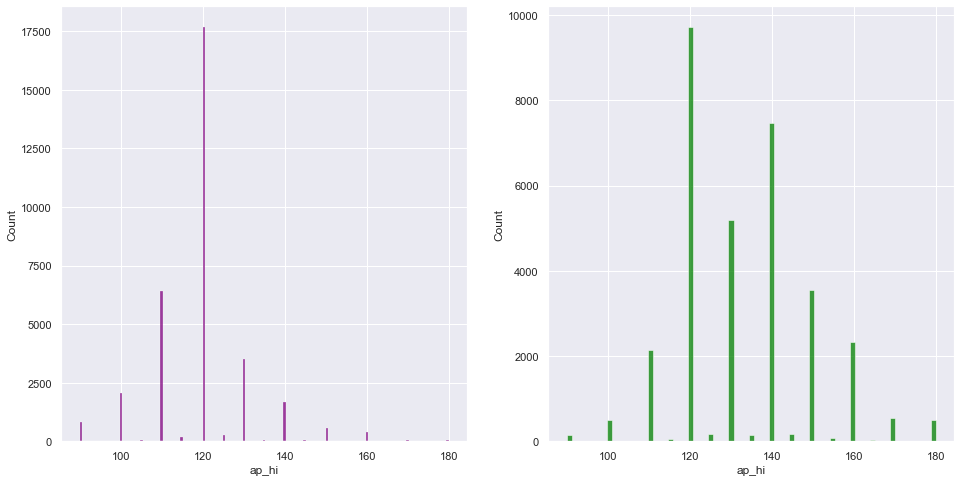

In [19]:
# Systolic Blood Pressure
f, axes = plt.subplots(1, 2, figsize=(16, 8))
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'ap_hi'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'ap_hi'].copy()
sb.histplot(data=non_cvd, ax=axes[0], color='purple')
sb.histplot(data=cvd, ax=axes[1], color='green')

In [20]:
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'ap_hi'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'ap_hi'].copy()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.update_layout(title_text="Non-CVD vs CVD ap_hi distribution", template="plotly_white")
fig.add_trace(go.Pie(values=non_cvd.value_counts().values, labels=cleanedData[cleanedData['cardio'] == 0]['ap_hi'].value_counts().index.to_list()),row=1, col=1)
fig.add_trace(go.Pie(values=cvd.value_counts().values, labels=cleanedData[cleanedData['cardio'] == 1]['ap_hi'].value_counts().index.to_list()),row=1, col=2)
fig.update_traces(textposition='inside')
fig.show()



From the histograms and pie Chart, we can see that for Systolic blood pressure, up till 120 mm hg, the pattern is the same. But for 120mm hg and onwards, there is a noticeable increase in population of ppl having cvd for Systolic blood pressure of more than 120mm hg.

Thus we can consider Systolic blood pressure as a factor.

##### Diastolic blood pressure

<AxesSubplot:xlabel='ap_lo', ylabel='Count'>

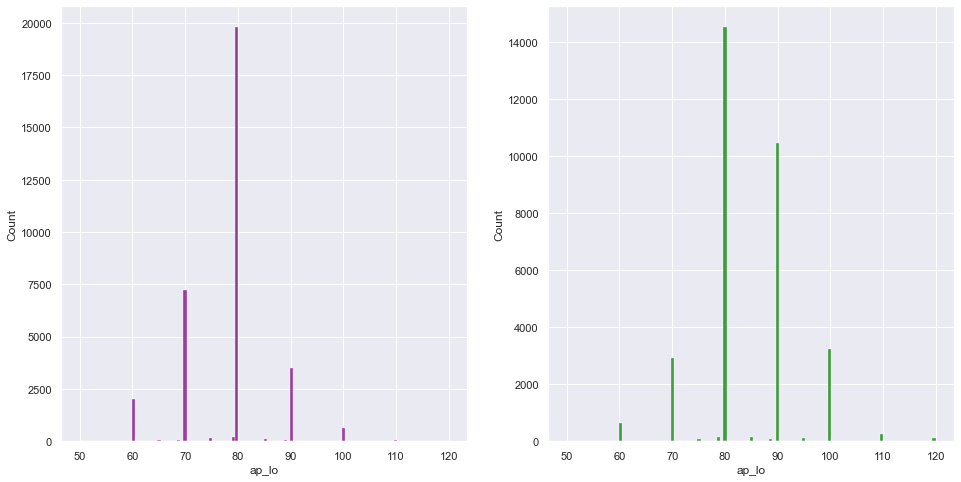

In [21]:
#Diastolic Blood Pressure
f, axes = plt.subplots(1, 2, figsize=(16, 8))
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'ap_lo'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'ap_lo'].copy()
sb.histplot(data=non_cvd, ax=axes[0], color='purple')
sb.histplot(data=cvd, ax=axes[1], color='green')

In [22]:
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'ap_hi'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'ap_hi'].copy()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.update_layout(title_text="Non-CVD vs CVD ap_lo distribution", template="plotly_white")
fig.add_trace(go.Pie(values=non_cvd.value_counts().values, labels=cleanedData[cleanedData['cardio'] == 0]['ap_lo'].value_counts().index.to_list()),row=1, col=1)
fig.add_trace(go.Pie(values=cvd.value_counts().values, labels=cleanedData[cleanedData['cardio'] == 1]['ap_lo'].value_counts().index.to_list()),row=1, col=2)
fig.update_traces(textposition='inside')
fig.show()

Likewise with Systolic Blood Pressure, from the histograms and pie Chart, we can see that for Diastolic blood pressure, up till 80 mm hg, the pattern is the same. But for 120mm hg and onwards, there is a noticeable increase in population of ppl having cvd for Diastolic blood pressure of more than 80mm hg.

Thus we can consider Diastolic blood pressure as a factor.

##### Cholesterol

In [23]:
#Cholesterol
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'cholesterol'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'cholesterol'].copy()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.update_layout(title_text="Non-CVD vs CVD Cholesterol distribution", template="plotly_white")
fig.add_trace(go.Pie(values=non_cvd.value_counts().values,labels=['normal' ,'above normal', 'well above normal']),row=1, col=1)
fig.add_trace(go.Pie(values=cvd.value_counts().values,labels=['normal' ,'above normal', 'well above normal']),row=1, col=2)
fig.show()

There seems to be some correlation of cholesterol level with CVD as there is very significant increase for the category "well above normal". We may want to consider this factor in our prediction model.

##### Glucose

In [24]:
#glucose
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'gluc'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'gluc'].copy()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.update_layout(title_text="Non-CVD vs CVD glucose distribution", template="plotly_white")
fig.add_trace(go.Pie(values=non_cvd.value_counts().values,labels=['normal' ,'above normal', 'well above normal']),row=1, col=1)
fig.add_trace(go.Pie(values=cvd.value_counts().values,labels=['normal' ,'above normal', 'well above normal']),row=1, col=2)
fig.show()

There does not seems to be some correlation of glucose level with CVD as their pie-chart looked similar, compared to cholesterol level. We should not consider this factor in our prediction model.

##### Smoking

In [25]:
#Smoking
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'smoke'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'smoke'].copy()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.update_layout(title_text="Non-CVD vs CVD smoking distribution", template="plotly_white")
fig.add_trace(go.Pie(values=non_cvd.value_counts().values,labels=['Dont smoke', 'Smoke']),row=1, col=1)
fig.add_trace(go.Pie(values=cvd.value_counts().values,labels=['Dont smoke', 'Smoke']),row=1, col=2)
fig.show()

Similarly to glucose level, there does not seems to be some correlation of smoking with CVD as their pie-chart looked similar, compared to cholesterol level. We should not consider this factor in our prediction model.

##### Alcohol intake

In [26]:
#Alcohol-intake
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'alco'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'alco'].copy()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.update_layout(title_text="Non-CVD vs CVD Alcohol-intake distribution", template="plotly_white")
fig.add_trace(go.Pie(values=non_cvd.value_counts().values,labels=['Dont Drink', 'Drinks']),row=1, col=1)
fig.add_trace(go.Pie(values=cvd.value_counts().values,labels=['Dont Drink', 'Drinks']),row=1, col=2)
fig.show()

Similarly to glucose level, there does not seems to be some correlation of alchohol consumption with CVD as their pie-chart looked similar, compared to cholesterol level. We should not consider this factor in our prediction model.

##### Physical activity

In [27]:
#Physical Activity
cvd = cleanedData.loc[cleanedData['cardio'] == 1, 'alco'].copy()
non_cvd = cleanedData.loc[cleanedData['cardio'] == 0, 'alco'].copy()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.update_layout(title_text="Non-CVD vs CVD Physical Activity distribution", template="plotly_white")
fig.add_trace(go.Pie(values=non_cvd.value_counts().values,labels=['Not Active', 'Is active']),row=1, col=1)
fig.add_trace(go.Pie(values=cvd.value_counts().values,labels=['Not Active', 'Is active']),row=1, col=2)
fig.show()

Similarly to glucose level, there does not seems to be some correlation of physical activity with CVD as their pie-chart looked similar, compared to cholesterol level. We should not consider this factor in our prediction model.

##### BMI (Calculated using height and weight)

##### Pulse pressure (Calculated using Systolic blood pressure and Diastolic blood pressure)